# MODEL TRAINING WITH AUGMENTED DATA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from PIL import Image
import os

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
print("Version: ", tf.__version__) # Check tf version
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE") # Check GPU status
physical_devices = tf.config.experimental.list_physical_devices('GPU') # Config GPU
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Version:  2.2.0
GPU is available


### Training with h_flip images

In [13]:
images_h = np.load('h_images.npy')
label = np.load('labels.npy')

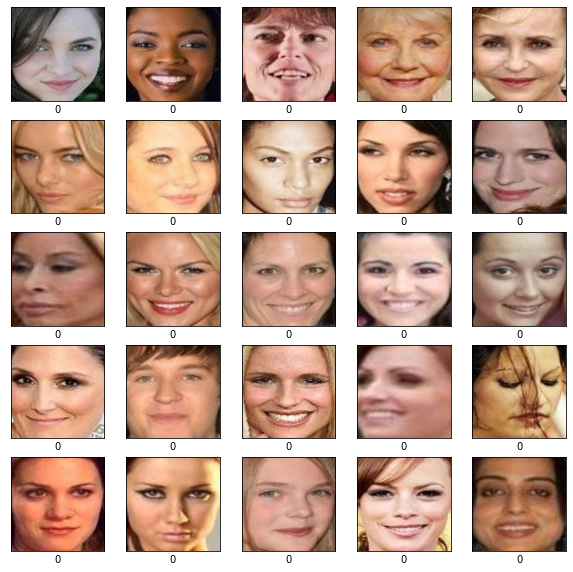

In [14]:
image = images_h[:25].tolist()

# Image Verification (Female)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

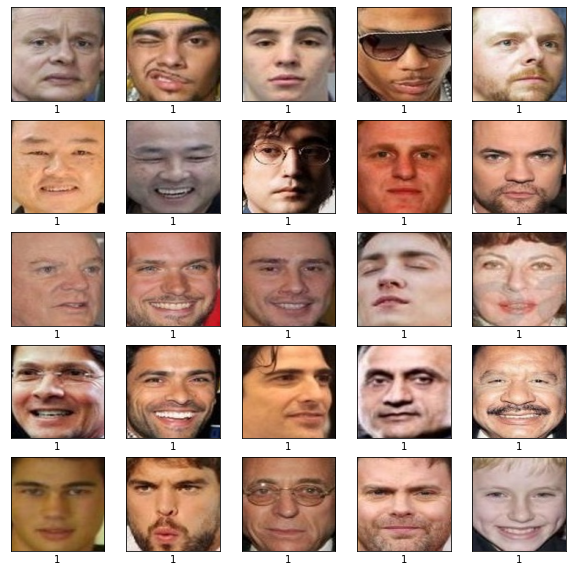

In [15]:
# Image Verification (Male)
image = images_h[-25:].tolist()

plt.figure(figsize=(10,10))
n = 0
for i in range(-25, 0):
    plt.subplot(5,5,n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
    n+=1
plt.show()

In [16]:
images_v = np.load('v_images.npy')

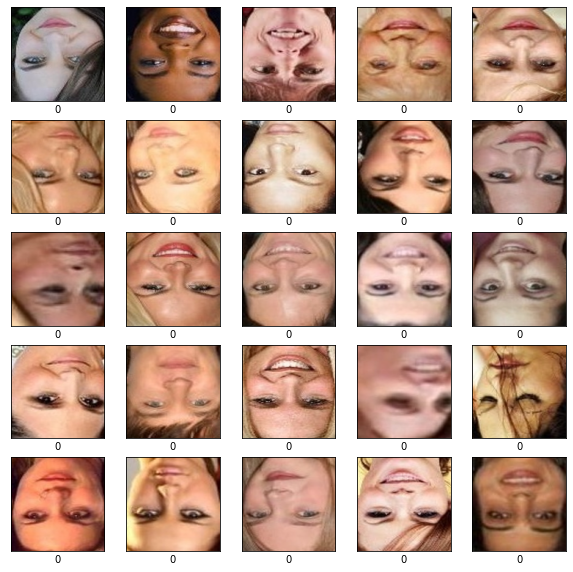

In [17]:
image = images_v[:25].tolist()

# Image Verification (Female)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

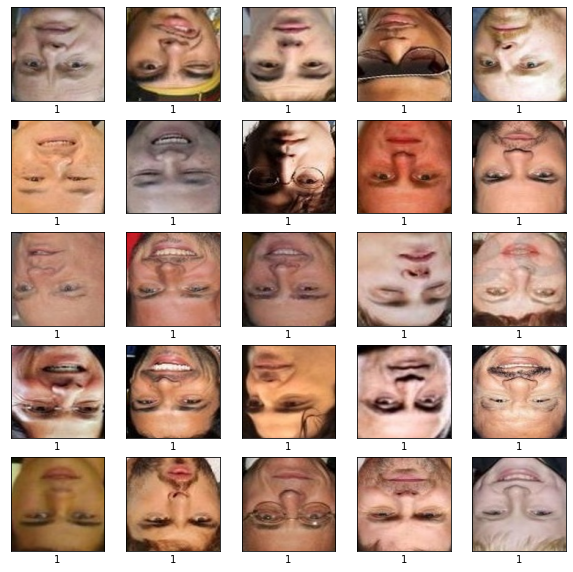

In [18]:
# Image Verification (Male)
image = images_v[-25:].tolist()

plt.figure(figsize=(10,10))
n = 0
for i in range(-25, 0):
    plt.subplot(5,5,n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
    n+=1
plt.show()

In [19]:
images_r = np.load('r_images.npy')

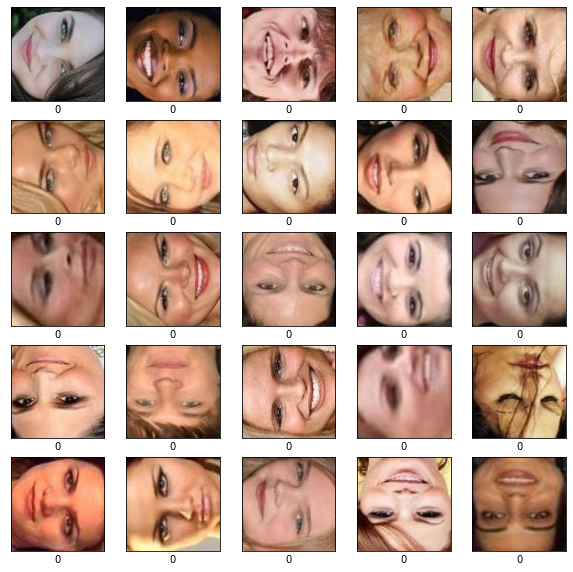

In [20]:
image = images_r[:25].tolist()

# Image Verification (Female)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

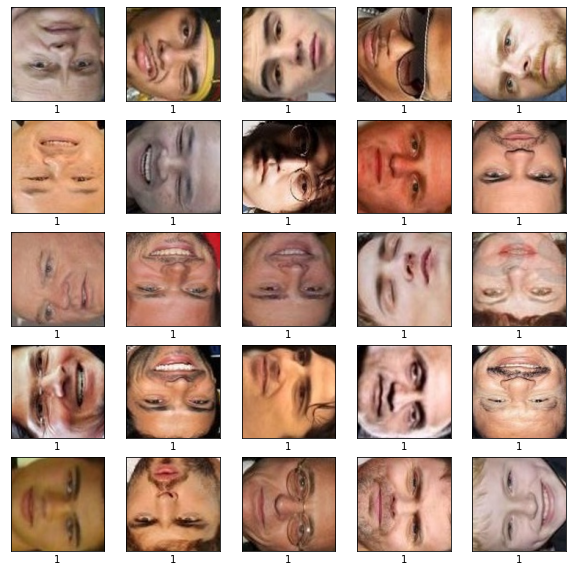

In [21]:
# Image Verification (Male)
image = images[-25:].tolist()

plt.figure(figsize=(10,10))
n = 0
for i in range(-25, 0):
    plt.subplot(5,5,n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
    n+=1
plt.show()

In [30]:
images = []
images.extend(images_h)
images.extend(images_v)
images.extend(images_r)
images = np.asarray(images)

In [31]:
labels = []
labels.extend(label)
labels.extend(label)
labels.extend(label)
labels = np.asarray(labels)

In [32]:
# train_test_split
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size= TEST_SIZE)

MemoryError: Unable to allocate 2.58 GiB for an array with shape (28206, 128, 128, 3) and data type float16

In [ ]:
print("X_train dimensions:", X_train.shape)
print("X_test dimensions:", X_test.shape)
print("y_train dimensions:", y_train.shape)
print("y_test dimensions:", y_test.shape)

In [ ]:
print("Total number of training data:", X_train.shape[0])
print("Total number of validation data:", X_test.shape[0])

In [25]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 20, verbose= 1)

Epoch 1/20
1176/1176 [==============================] - 33s 28ms/step - loss: 0.3519 - accuracy: 0.8500 - val_loss: 0.2188 - val_accuracy: 0.9133
Epoch 2/20
1176/1176 [==============================] - 31s 26ms/step - loss: 0.2426 - accuracy: 0.9052 - val_loss: 0.2013 - val_accuracy: 0.9236
Epoch 3/20
1176/1176 [==============================] - 29s 25ms/step - loss: 0.2173 - accuracy: 0.9165 - val_loss: 0.2015 - val_accuracy: 0.9207
Epoch 4/20
1176/1176 [==============================] - 36s 31ms/step - loss: 0.1920 - accuracy: 0.9244 - val_loss: 0.1836 - val_accuracy: 0.9276
Epoch 5/20
1176/1176 [==============================] - 30s 25ms/step - loss: 0.1709 - accuracy: 0.9342 - val_loss: 0.1828 - val_accuracy: 0.9283
Epoch 6/20
1176/1176 [==============================] - 28s 24ms/step - loss: 0.1601 - accuracy: 0.9382 - val_loss: 0.1969 - val_accuracy: 0.9234
Epoch 7/20
1176/1176 [==============================] - 37s 31ms/step - loss: 0.1457 - accuracy: 0.9447 - val_loss: 0.1835 -

294/294 - 3s - loss: 0.2361 - accuracy: 0.9352


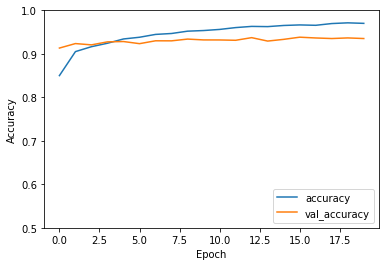

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2) 

In [ ]:
models.save()